# <center><b style='color:green'>Project: AllLife Credit Card Customer Segmentation</b> </center>

# Objective:
Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

## Objective:

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Key Questions:

How many different segments of customers are there?


How are these segments different from each other?


What are your recommendations to the bank on how to better market to and service these customers?

#### Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

Customer key - Identifier for the customer

Average Credit Limit - Average credit limit across all the credit cards

Total credit cards - Total number of credit cards

Total visits bank - Total number of bank visits

Total visits online - total number of online visits

Total calls made - Total number of calls made by the customer

### Steps to follow: 

Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)

Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

Calculate average silhouette score for both methods. (5 marks)

Compare K-means clusters with Hierarchical clusters. (5 marks)

Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

#### GitHub URL:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-sannidhisiva/tree/master/Clustering

---------------------------------------------------------------------------------------------------------------------------

## <b style='color:green;'>Step 1: EDA</b>

##### 1.1 Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data.

##### 1.2 Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd

In [3]:
# reading the CSV file into pandas dataframe
mydata = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
mydata.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [5]:
#Info of the dataset
mydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
mydata.describe().transpose()

count          mean           std      min       25%  \
Sl_No                660.0    330.500000    190.669872      1.0    165.75   
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%       75%       max  
Sl_No                  330.5    495.25     660.0  
Customer Key         53874.5  77202.50   99843.0  
Avg_Credit_Limit     18000.0  48000.00  200000.0  
Total_Credit_Cards       5.0      6.00      10.0  
Total_visits_bank        2.0      4.00       5.0  
Total_visits_online      2.0      4.00      15.0  
Total_calls_made         3.0      5.00      10.0

In [7]:
mydata.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### No Null Values

In [8]:
# Data type of the columns 
mydata.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

#### No Category Types.All  are type Int

In [9]:
#Creating Profile Report for Analysis
#!pip install pandas_profiling
import pandas_profiling
mydata.profile_report()

In [10]:
mydata = mydata.drop_duplicates(subset=None, keep="first", inplace=False)
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 41.2 KB


In [11]:
mydata_count = mydata.groupby(['Customer Key'], sort=False).size().reset_index(name='Count')
mydata_count
duplicateRows=mydata_count[mydata_count['Count']==2]
print (duplicateRows)

     Customer Key  Count
4           47437      2
48          37252      2
104         97935      2
390         96929      2
409         50706      2


#### Explanations : There are multiple records with same customerkeys so considering record with more Avg Credit Limit.

In [12]:
for index, row in duplicateRows.iterrows():
    rec=mydata[mydata['Customer Key']==row['Customer Key']]
    for index, row in rec.iterrows():
            delrecord=row
            print(delrecord)
    
rec1=mydata[mydata['Customer Key']==47437] [mydata['Avg_Credit_Limit']==17000].index
mydata = mydata.drop(rec1)
mydata = mydata.drop(mydata[mydata['Customer Key']==37252] [mydata['Avg_Credit_Limit']==6000].index)
mydata = mydata.drop(mydata[mydata['Customer Key']==97935] [mydata['Avg_Credit_Limit']==17000].index)
mydata = mydata.drop(mydata[mydata['Customer Key']==96929] [mydata['Avg_Credit_Limit']==13000].index)
mydata = mydata.drop(mydata[mydata['Customer Key']==50706] [mydata['Avg_Credit_Limit']==44000].index)

Sl_No                       5
Customer Key            47437
Avg_Credit_Limit       100000
Total_Credit_Cards          6
Total_visits_bank           0
Total_visits_online        12
Total_calls_made            3
Name: 4, dtype: int64
Sl_No                    333
Customer Key           47437
Avg_Credit_Limit       17000
Total_Credit_Cards         7
Total_visits_bank          3
Total_visits_online        1
Total_calls_made           0
Name: 332, dtype: int64
Sl_No                     49
Customer Key           37252
Avg_Credit_Limit        6000
Total_Credit_Cards         4
Total_visits_bank          0
Total_visits_online        2
Total_calls_made           8
Name: 48, dtype: int64
Sl_No                    433
Customer Key           37252
Avg_Credit_Limit       59000
Total_Credit_Cards         6
Total_visits_bank          2
Total_visits_online        1
Total_calls_made           2
Name: 432, dtype: int64
Sl_No                    105
Customer Key           97935
Avg_Credit_Limit       17000
T

<ipython-input-12-71ca180b507d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rec1=mydata[mydata['Customer Key']==47437] [mydata['Avg_Credit_Limit']==17000].index
<ipython-input-12-71ca180b507d>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mydata = mydata.drop(mydata[mydata['Customer Key']==37252] [mydata['Avg_Credit_Limit']==6000].index)
<ipython-input-12-71ca180b507d>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mydata = mydata.drop(mydata[mydata['Customer Key']==97935] [mydata['Avg_Credit_Limit']==17000].index)
<ipython-input-12-71ca180b507d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mydata = mydata.drop(mydata[mydata['Customer Key']==96929] [mydata['Avg_Credit_Limit']==13000].index)
<ipython-input-12-71ca180b507d>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mydata = mydata.drop(mydata[mydata['Custom

In [13]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [14]:
mydata.drop('Sl_No', axis=1, inplace=True)
mydata.drop('Customer Key', axis=1, inplace=True)

### Explanation: removing unique fields 

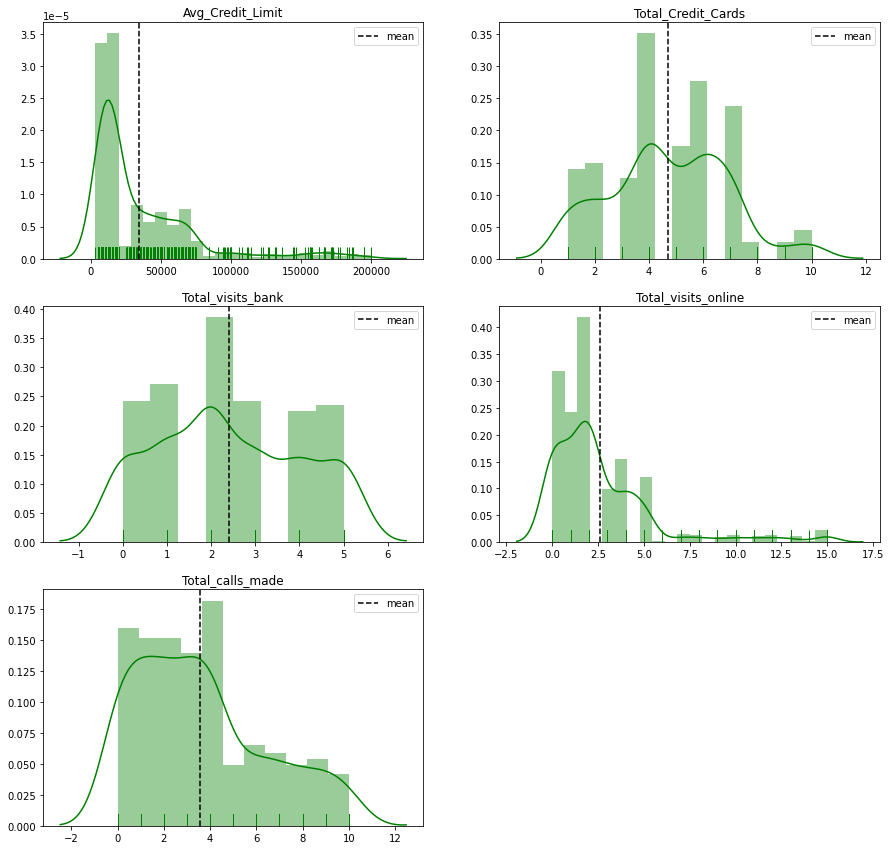

In [15]:
import itertools

cols = [i for i in mydata.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(mydata[i],color='green',rug=True)
    plt.axvline(mydata[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

#### Summary: looks like Avg_Credit_Limit & Total Visits Online Skewed right. 
#### Total Credit Cards,Total Visits bank looks like uniformly distributed 

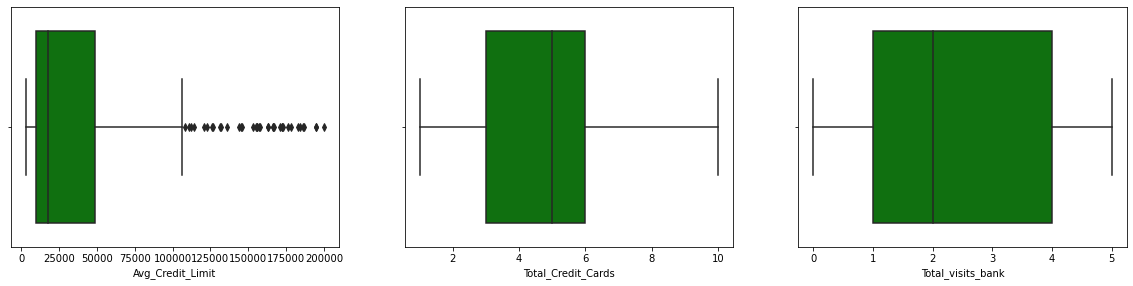

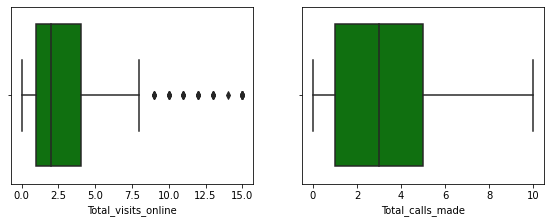

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= mydata.Avg_Credit_Limit, color='green')

plt.subplot(3,3,2)
sns.boxplot(x= mydata.Total_Credit_Cards, color='green')

plt.subplot(3,3,3)
sns.boxplot(x= mydata.Total_visits_bank, color='green')

plt.show()

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= mydata.Total_visits_online, color='green')

plt.subplot(4,4,2)
sns.boxplot(x= mydata.Total_calls_made, color='green')


plt.show()

#### Explanation:  There are more outlieres for Average Credit Limit and few for Total Visits Online

In [17]:
#SKEWNESS
mydata.skew(axis = 0, skipna = True)

Avg_Credit_Limit       2.193141
Total_Credit_Cards     0.141287
Total_visits_bank      0.142998
Total_visits_online    2.217058
Total_calls_made       0.659476
dtype: float64

#### Explanation:  Average Credit Limit and Total Visits Online more skewed

In [18]:
mydata.info()
saveDF = mydata.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


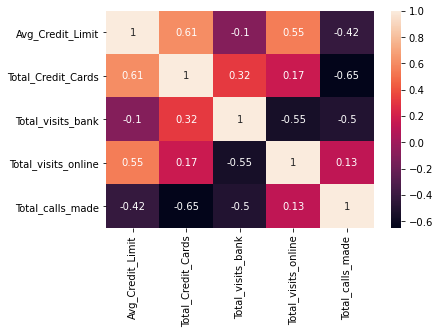

In [19]:
corr = mydata.corr()
sns.heatmap(corr, annot = True)

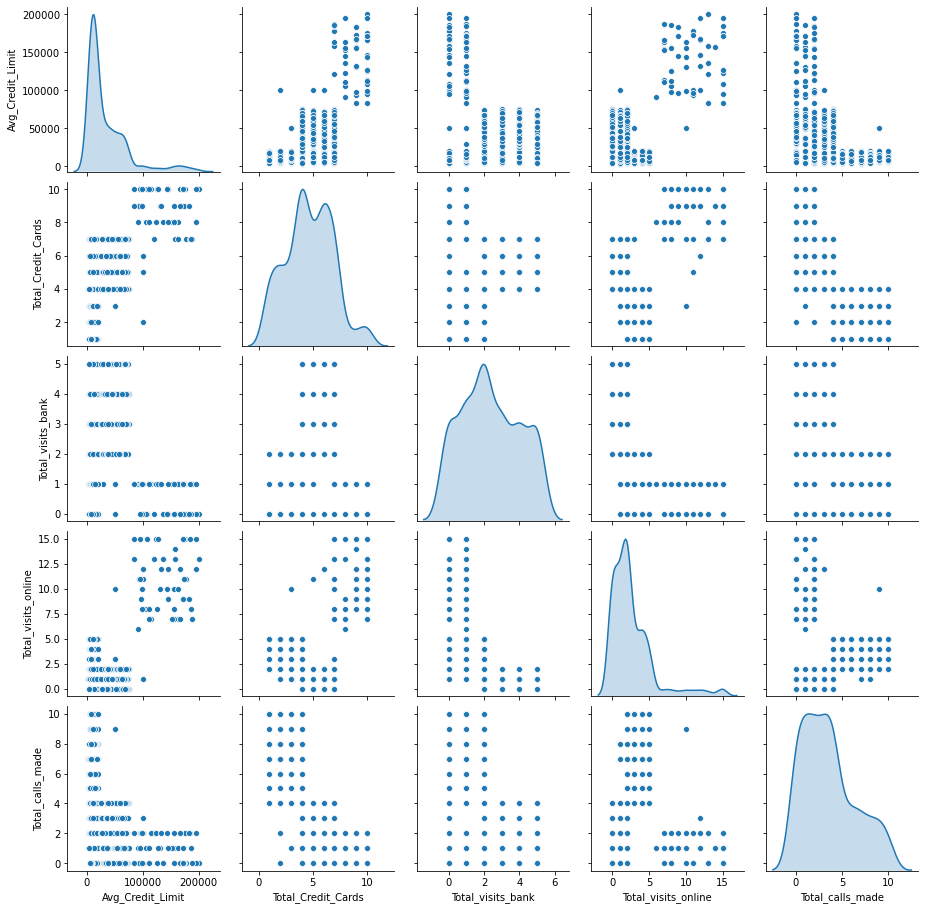

In [20]:
import seaborn as sns
sns.pairplot(mydata, diag_kind='kde') 

In [21]:
mydata['Avg_Credit_Limit'].value_counts()

8000      35
6000      30
9000      28
13000     27
10000     26
          ..
25000      1
153000     1
111000     1
112000     1
106000     1
Name: Avg_Credit_Limit, Length: 110, dtype: int64

In [22]:
mydata['Total_Credit_Cards'].value_counts()

4     148
6     117
7     100
5      74
2      63
1      59
3      53
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [23]:
mydata['Total_visits_bank'].value_counts()

2    158
1    111
3     99
0     99
5     96
4     92
Name: Total_visits_bank, dtype: int64

In [24]:
mydata['Total_visits_online'].value_counts()

2     187
0     142
1     108
4      69
5      54
3      44
15     10
7       7
12      6
10      6
8       6
13      5
11      5
9       4
14      1
6       1
Name: Total_visits_online, dtype: int64

In [25]:
mydata['Total_calls_made'].value_counts()

4     108
0      95
2      90
1      90
3      83
6      39
7      35
9      32
8      29
5      29
10     25
Name: Total_calls_made, dtype: int64

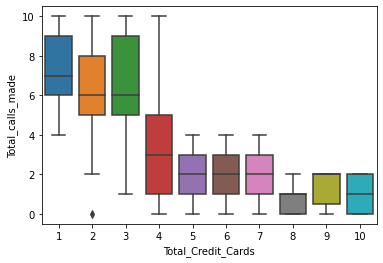

In [26]:
sns.boxplot(x='Total_Credit_Cards',y='Total_calls_made',data=mydata)

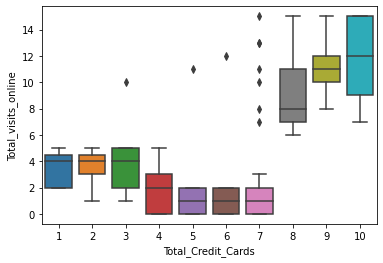

In [27]:
sns.boxplot(x='Total_Credit_Cards',y='Total_visits_online',data=mydata)

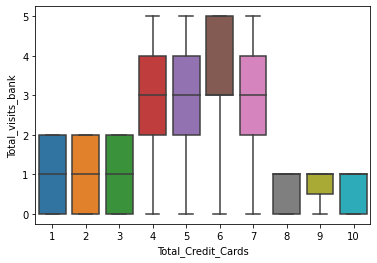

In [28]:
sns.boxplot(x='Total_Credit_Cards',y='Total_visits_bank',data=mydata)

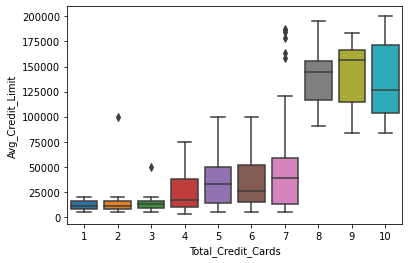

In [29]:
sns.boxplot(x='Total_Credit_Cards',y='Avg_Credit_Limit',data=mydata)

### Corelation between given data

------------------------------------------------------------------------------------------------------------------------

In [30]:
mydata.corr()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Avg_Credit_Limit             1.000000            0.610227          -0.102314   
Total_Credit_Cards           0.610227            1.000000           0.317103   
Total_visits_bank           -0.102314            0.317103           1.000000   
Total_visits_online          0.551581            0.167892          -0.552223   
Total_calls_made            -0.416628           -0.651979          -0.501813   

                     Total_visits_online  Total_calls_made  
Avg_Credit_Limit                0.551581         -0.416628  
Total_Credit_Cards              0.167892         -0.651979  
Total_visits_bank              -0.552223         -0.501813  
Total_visits_online             1.000000          0.126250  
Total_calls_made                0.126250          1.000000

In [31]:
pd.crosstab(mydata['Total_visits_bank'],mydata['Total_calls_made'], normalize='columns')

Total_calls_made         0         1         2         3         4         5   \
Total_visits_bank                                                               
0                  0.073684  0.066667  0.088889  0.012048  0.092593  0.344828   
1                  0.105263  0.111111  0.122222  0.000000  0.138889  0.344828   
2                  0.200000  0.155556  0.233333  0.216867  0.268519  0.310345   
3                  0.210526  0.211111  0.200000  0.253012  0.194444  0.000000   
4                  0.221053  0.211111  0.200000  0.277108  0.101852  0.000000   
5                  0.189474  0.244444  0.155556  0.240964  0.203704  0.000000   

Total_calls_made         6         7         8      9     10  
Total_visits_bank                                             
0                  0.256410  0.371429  0.344828  0.375  0.48  
1                  0.358974  0.342857  0.310345  0.375  0.32  
2                  0.384615  0.285714  0.344828  0.250  0.20  
3                  0.000000  0.000000  0.000000  0.000  0.00  
4                  0.000000  0.000000  0.000000  0.000  0.00  
5                  0.000000  0.000000  0.000000  0.000  0.00

In [32]:
pd.crosstab(mydata['Total_Credit_Cards'],mydata['Total_calls_made'], normalize='columns')

Total_calls_made          0         1         2         3         4   \
Total_Credit_Cards                                                     
1                   0.000000  0.000000  0.000000  0.000000  0.055556   
2                   0.010526  0.000000  0.011111  0.000000  0.111111   
3                   0.000000  0.011111  0.000000  0.000000  0.064815   
4                   0.231579  0.244444  0.222222  0.228916  0.212963   
5                   0.136842  0.155556  0.166667  0.168675  0.166667   
6                   0.284211  0.244444  0.222222  0.361446  0.166667   
7                   0.200000  0.200000  0.211111  0.240964  0.222222   
8                   0.042105  0.055556  0.022222  0.000000  0.000000   
9                   0.031579  0.022222  0.066667  0.000000  0.000000   
10                  0.063158  0.066667  0.077778  0.000000  0.000000   

Total_calls_made          5         6         7         8        9     10  
Total_Credit_Cards                                                         
1                   0.275862  0.179487  0.342857  0.241379  0.31250  0.36  
2                   0.241379  0.282051  0.228571  0.413793  0.18750  0.20  
3                   0.275862  0.333333  0.171429  0.137931  0.28125  0.20  
4                   0.206897  0.205128  0.257143  0.206897  0.21875  0.24  
5                   0.000000  0.000000  0.000000  0.000000  0.00000  0.00  
6                   0.000000  0.000000  0.000000  0.000000  0.00000  0.00  
7                   0.000000  0.000000  0.000000  0.000000  0.00000  0.00  
8                   0.000000  0.000000  0.000000  0.000000  0.00000  0.00  
9                   0.000000  0.000000  0.000000  0.000000  0.00000  0.00  
10                  0.000000  0.000000  0.000000  0.000000  0.00000  0.00

In [33]:
pd.crosstab(mydata['Total_Credit_Cards'],mydata['Total_visits_bank'], normalize='columns')

Total_visits_bank          0         1         2         3         4         5
Total_Credit_Cards                                                            
1                   0.212121  0.189189  0.107595  0.000000  0.000000  0.000000
2                   0.252525  0.162162  0.126582  0.000000  0.000000  0.000000
3                   0.212121  0.162162  0.088608  0.000000  0.000000  0.000000
4                   0.121212  0.198198  0.221519  0.262626  0.293478  0.270833
5                   0.010101  0.009009  0.151899  0.151515  0.195652  0.156250
6                   0.010101  0.000000  0.151899  0.343434  0.260870  0.354167
7                   0.040404  0.036036  0.151899  0.242424  0.250000  0.218750
8                   0.040404  0.063063  0.000000  0.000000  0.000000  0.000000
9                   0.030303  0.072072  0.000000  0.000000  0.000000  0.000000
10                  0.070707  0.108108  0.000000  0.000000  0.000000  0.000000

#### looks like more credit cards(Long Customer) less Calls Made/Less Visits to the Bank.if customer has new credit card then the frequency of contacing for help is more.

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------

## <b style='color:green'> Step 3- K-means clustering use elbow plot and analyse clusters using boxplot</b>

In [34]:
##Scale the data
from scipy.stats import zscore
mydata_scaled = mydata.apply(zscore)

In [35]:
##Scale the data
from scipy.stats import zscore

cluster_sil_scores = []
cluster_errors = []

cluster_range = range( 2, 15)  

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10, random_state=5)
    clusters.fit(mydata_scaled)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia
    cluster_sil_scores.append(metrics.silhouette_score(mydata_scaled, labels, metric='euclidean'))
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters  cluster_errors  Avg Sil Score
0              2     2027.386090       0.417724
1              3      926.079337       0.515466
2              4      774.625025       0.355757
3              5      698.827483       0.272974
4              6      637.374294       0.255423
5              7      595.697908       0.248684
6              8      558.642798       0.227559
7              9      533.769571       0.212046
8             10      508.110666       0.210691
9             11      484.596043       0.201332
10            12      457.625237       0.208423
11            13      440.776224       0.206808
12            14      423.951424       0.210908

### Summary- Cluster 3 has good Avg Sil Score

### elbow plot

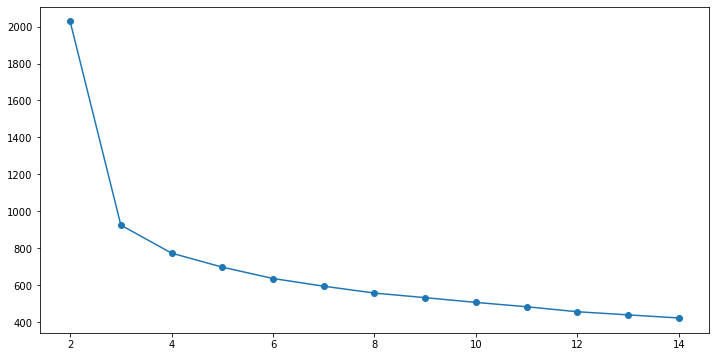

In [36]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

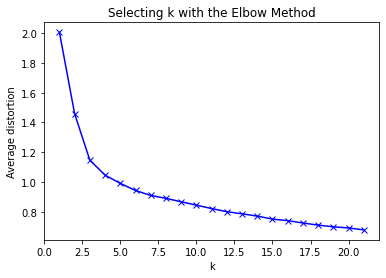

In [37]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,22)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata_scaled)
    prediction=model.predict(mydata_scaled)
    meanDistortions.append(sum(np.min(cdist(mydata_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / mydata_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [38]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(mydata_scaled)
prediction=final_model.predict(mydata_scaled)
#Append the prediction 
mydata_scaled["GROUP"] = prediction
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata.head()

Groups Assigned : 



Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  GROUP  
0                    1                 0      0  
1                   10                 9      2  
2                    3                 4      0  
3                    1                 4      0  
4                   12                 3      1

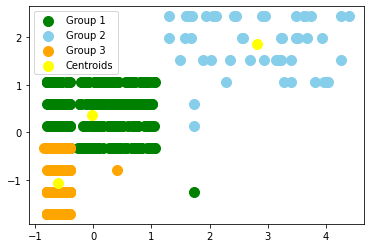

In [39]:
#Visualising the clusters
x = mydata_scaled.values
y_kmeans=prediction
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Group 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'skyblue', label = 'Group 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Group 3')

#Plotting the centroids of the clusters
plt.scatter(final_model.cluster_centers_[:, 0], final_model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


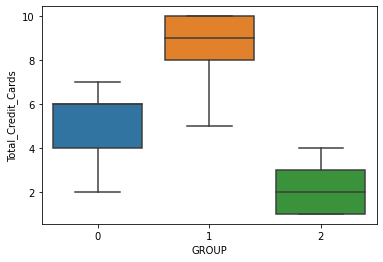

In [40]:
# Box plot to visualize GROUP vs Avg_Credit_Limit
sns.boxplot(x='GROUP', y='Total_Credit_Cards', data=mydata)

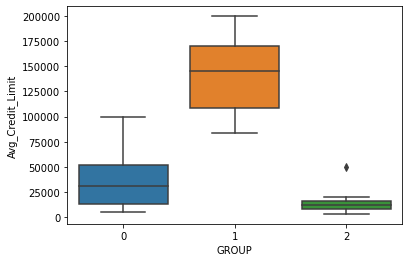

In [41]:
sns.boxplot(x='GROUP', y='Avg_Credit_Limit', data=mydata)

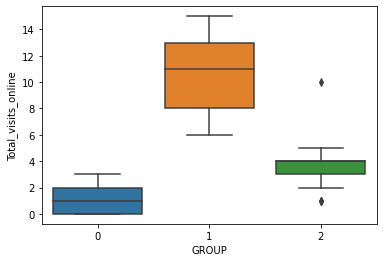

In [42]:
sns.boxplot(x='GROUP', y='Total_visits_online', data=mydata)

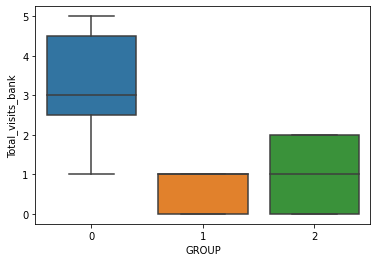

In [43]:
sns.boxplot(x='GROUP', y='Total_visits_bank', data=mydata)

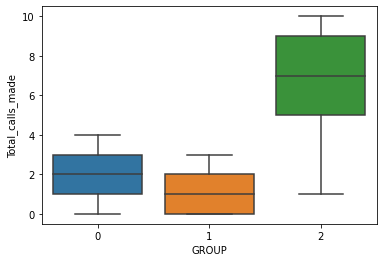

In [44]:
sns.boxplot(x='GROUP', y='Total_calls_made', data=mydata)

### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.

In [45]:
mydata_group = mydata.groupby(['GROUP'])
mydata_group.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0          33853.785901            5.519582           3.483029   
1         141040.000000            8.740000           0.600000   
2          12180.180180            2.405405           0.936937   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 0.986945          2.010444  
1                10.900000          1.080000  
2                 3.567568          6.851351

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002361BA0BC10>,
      dtype=object)

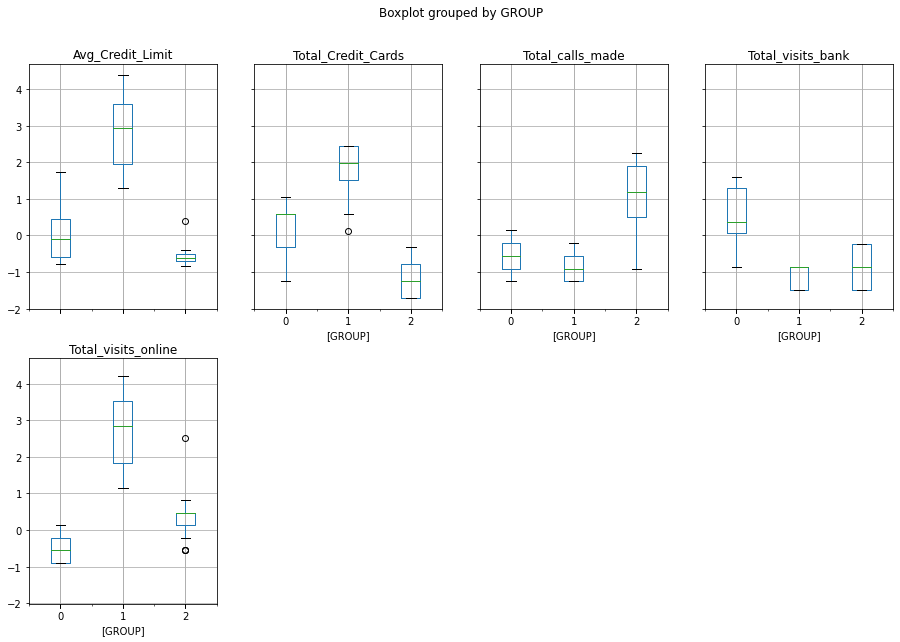

In [46]:
mydata_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Analyze the distribution of the data among the two groups (K = 5). One of the most informative visual tool is boxplot.

In [47]:
final_model=KMeans(5)
final_model.fit(mydata_scaled)
prediction=final_model.predict(mydata_scaled)

#Append the prediction 
mydata_scaled["GROUP"] = prediction
mydata["GROUP"] = prediction
print("Groups Assigned : \n")
mydata.head()

Groups Assigned : 



Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  GROUP  
0                    1                 0      3  
1                   10                 9      4  
2                    3                 4      3  
3                    1                 4      3  
4                   12                 3      2

In [48]:
mydata_group = mydata.groupby(['GROUP'])
mydata_group.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
GROUP                                                            
0          12019.801980            2.475248           1.000000   
1          31255.319149            5.494681           4.510638   
2         141040.000000            8.740000           0.600000   
3          36358.974359            5.543590           2.492308   
4          12314.049587            2.347107           0.884298   

       Total_visits_online  Total_calls_made  
GROUP                                         
0                 3.465347          5.009901  
1                 1.021277          1.946809  
2                10.900000          1.080000  
3                 0.953846          2.071795  
4                 3.652893          8.388430

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236167207F0>,
      dtype=object)

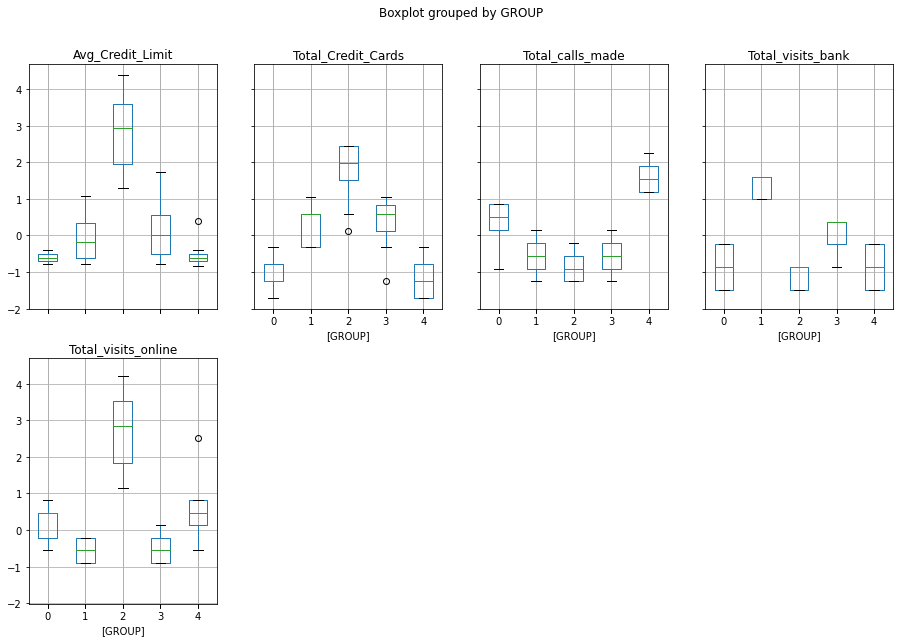

In [49]:
mydata_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [50]:
mydata_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     655 non-null    float64
 1   Total_Credit_Cards   655 non-null    float64
 2   Total_visits_bank    655 non-null    float64
 3   Total_visits_online  655 non-null    float64
 4   Total_calls_made     655 non-null    float64
 5   GROUP                655 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 53.3 KB


[[-6.01337046e-01 -1.03004582e+00 -8.60645586e-01  2.88078052e-01
   5.01604585e-01  2.00000000e+00]
 [-9.11081493e-02  3.61723941e-01  1.29750824e+00 -5.43163220e-01
  -5.73032967e-01 -2.22044605e-16]
 [ 2.82096934e+00  1.85761293e+00 -1.10654432e+00  2.81664350e+00
  -8.77139024e-01  1.00000000e+00]
 [ 4.42681104e-02  3.84267880e-01  5.67458628e-02 -5.66096674e-01
  -5.29183479e-01 -2.22044605e-16]
 [-5.93532024e-01 -1.08911038e+00 -9.31773320e-01  3.51863460e-01
   1.68690797e+00  2.00000000e+00]]


Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.601337           -1.030046          -0.860646   
1         -0.091108            0.361724           1.297508   
2          2.820969            1.857613          -1.106544   
3          0.044268            0.384268           0.056746   
4         -0.593532           -1.089110          -0.931773   

   Total_visits_online  Total_calls_made         GROUP  
0             0.288078          0.501605  2.000000e+00  
1            -0.543163         -0.573033 -2.220446e-16  
2             2.816644         -0.877139  1.000000e+00  
3            -0.566097         -0.529183 -2.220446e-16  
4             0.351863          1.686908  2.000000e+00

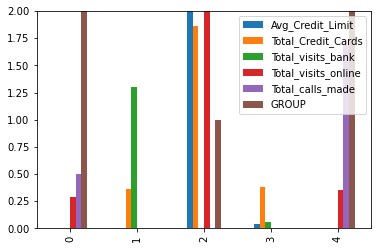

In [51]:
print(final_model.cluster_centers_)
#Avg_Credit_Limit	Total_Credit_Cards	Total_visits_bank	Total_visits_online	Total_calls_made
cols =["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GROUP"]
km_centers =pd.DataFrame(final_model.cluster_centers_,columns=cols)
km_centers.plot.bar(ylim=[0,2],fontsize=10)
km_centers

## PCA analysis for K-Means

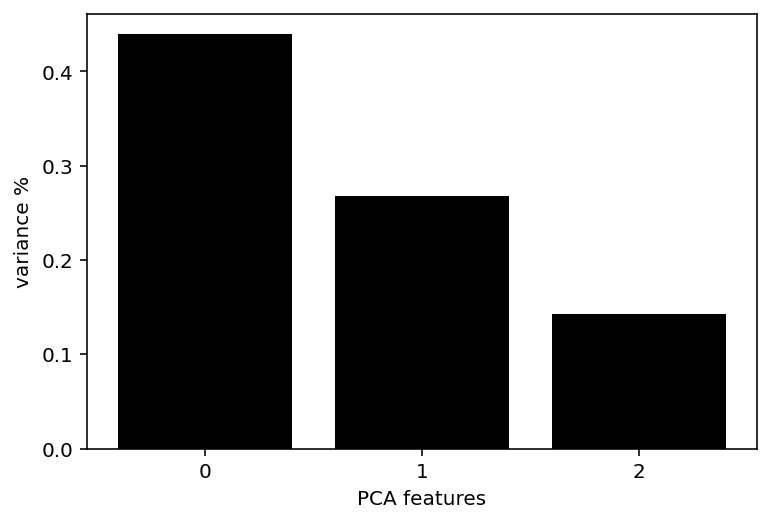

In [52]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
df = pd.read_excel("Credit Card Customer Data.xlsx")
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

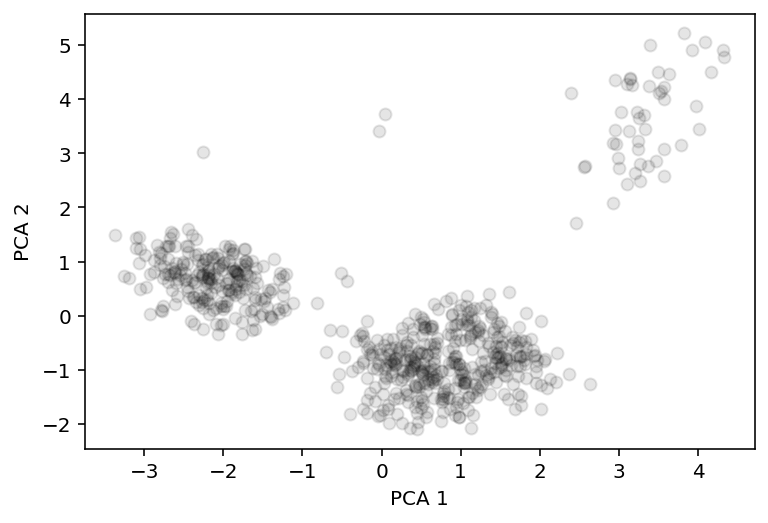

In [53]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

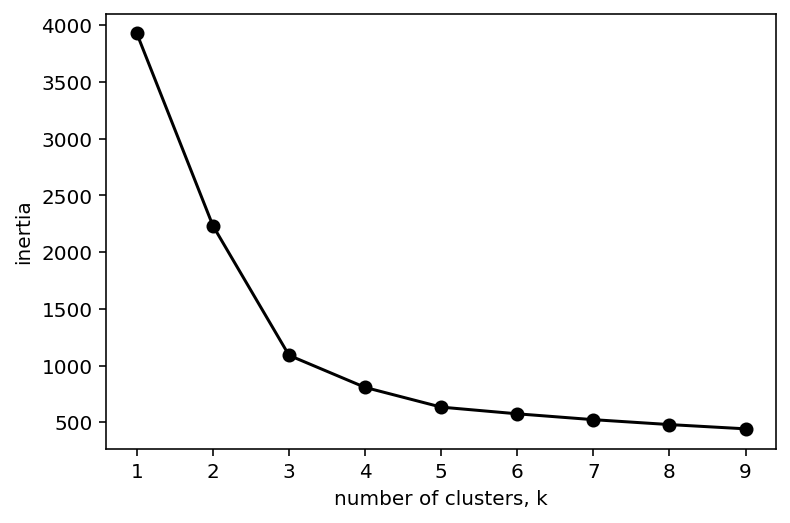

In [54]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [55]:
model1 = KMeans(n_clusters=2)
    
# Fit model to samples
model1.fit(PCA_components.iloc[:,:3])
    
prediction1=model1.predict(PCA_components)
    
PCA_components["GROUPS"] = prediction1
    
PCA_components.head()

PCA_components.groupby(['GROUPS']).mean()

0         1         2
GROUPS                              
0      -2.087874  0.687812 -0.014262
1       1.109334 -0.365450  0.007577

## <b style='color:green'> Step-4 Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot</b>

In [56]:
from sklearn.cluster import AgglomerativeClustering 

In [57]:
# reading the CSV file into pandas dataframe
mydata_h = saveDF.copy()
mydata_h_scaled = mydata_h.apply(zscore)
mydata_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


In [58]:
mydata_h_scaled = mydata_h.apply(zscore)
mydata_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


### linkage='Average'

In [59]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [60]:
model.fit(mydata_h_scaled)

AgglomerativeClustering(linkage='average')

In [61]:
mydata_h['labels'] = model.labels_

mydata_h_scaled["labels"] = prediction
mydata_h.head(100)

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
96              18000                   3                  2   
97              15000                   2                  0   
98              13000                   1                  1   
99               5000                   2                  1   
100             11000                   1                  0   

     Total_visits_online  Total_calls_made  labels  
0                      1                 0       0  
1                     10                 9       0  
2                      3                 4       0  
3                      1                 4       0  
4                     12                 3       1  
..                   ...               ...     ...  
96                     3                 6       0  
97                     5                 4       0  
98                     4                 9       0  
99                     4                 6       0  
100                    5                 6       0  

[100 rows x 6 columns]

In [62]:
mydata_h_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     655 non-null    float64
 1   Total_Credit_Cards   655 non-null    float64
 2   Total_visits_bank    655 non-null    float64
 3   Total_visits_online  655 non-null    float64
 4   Total_calls_made     655 non-null    float64
 5   labels               655 non-null    int32  
dtypes: float64(5), int32(1)
memory usage: 33.3 KB


In [63]:
custDataClust = mydata_h.groupby(['labels'])

In [64]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [65]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mydata_h_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(mydata_h_scaled))

c

0.9077903036298808

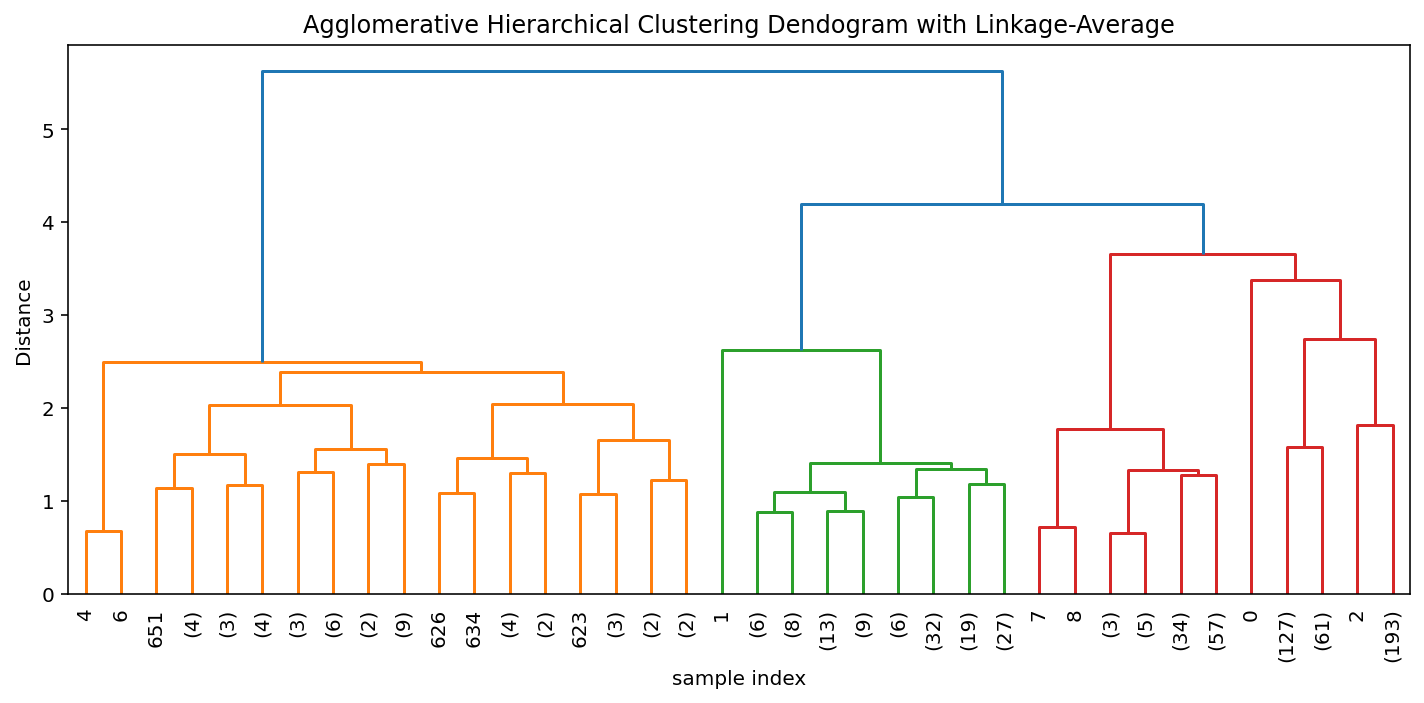

In [66]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram with Linkage-Average')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [67]:
custDataClust.mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels                                                            
0           25900.826446             4.37686            2.54876   
1          141040.000000             8.74000            0.60000   

        Total_visits_online  Total_calls_made  
labels                                         
0                  1.933884          3.786777  
1                 10.900000          1.080000

-----------------------------------------------------------------------------------------------------------------------------

### linkage-ward

In [68]:
# reading the CSV file into pandas dataframe
mydata_w = saveDF.copy()
mydata_w_scaled = mydata_w.apply(zscore)
mydata_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


In [69]:
model_ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
model_ward.fit(mydata_w_scaled)
mydata_w['labels_ward'] = model_ward.labels_
mydata_w_scaled["labels_ward"] = prediction
mydata_w.head(100)
mydata_w.groupby(['labels_ward']).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_ward                                                            
0                46321.759259            5.893519           3.152778   
1                12156.950673            2.417040           0.941704   

             Total_visits_online  Total_calls_made  
labels_ward                                         
0                       2.131944          1.898148  
1                       3.560538          6.838565

In [70]:
Z = linkage(mydata_h_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(mydata_w_scaled))

c

0.8301017592322434

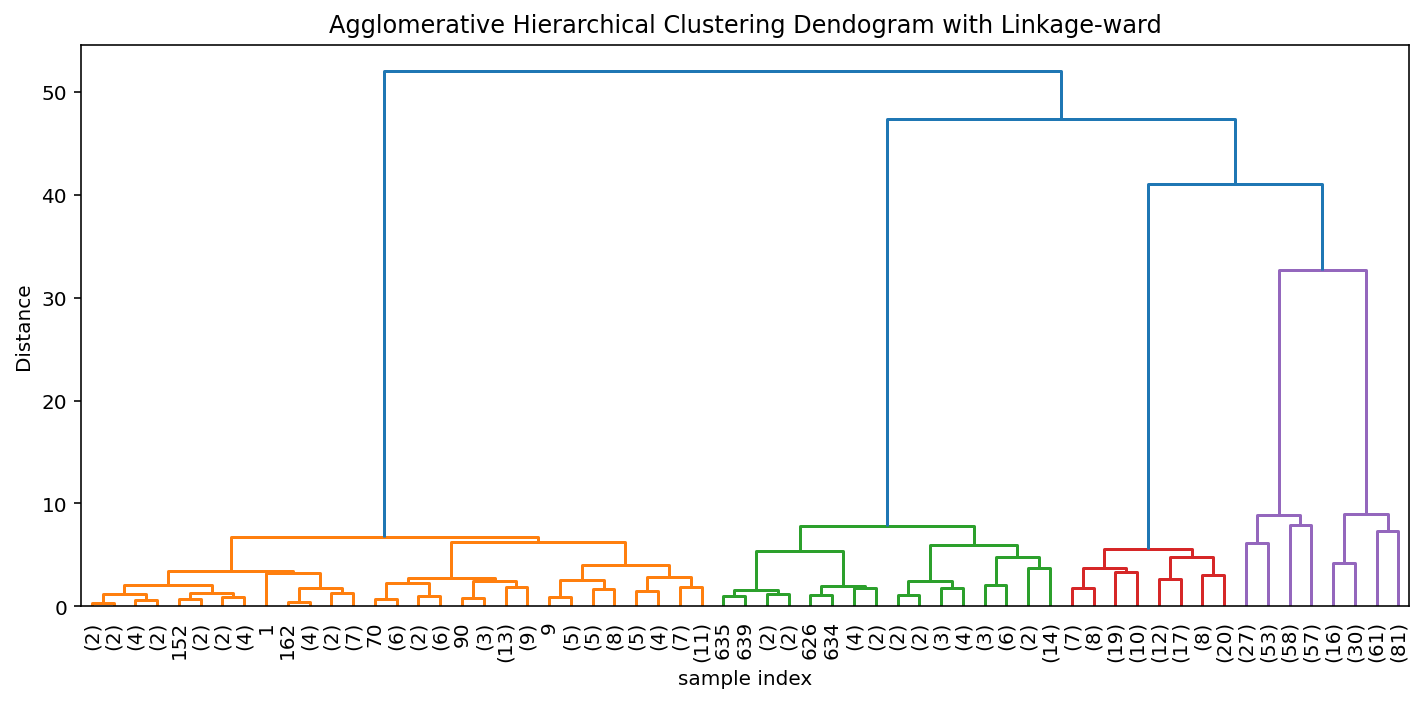

In [71]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram with Linkage-ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

------------------------------------------------------------------------------------------------------------------------------

### linkage-single

In [72]:
# reading the CSV file into pandas dataframe
mydata_single = saveDF.copy()
mydata_single_scaled = mydata_single.apply(zscore)
mydata_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


In [73]:
model_single = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='single')
model_single.fit(mydata_single_scaled)
mydata_single['labels_single'] = model_single.labels_

mydata_single_scaled["labels_single"] = prediction
mydata_single.head(100)
mydata_single.groupby(['labels_single']).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_single                                                            
0                  34666.666667            4.712538            2.40367   
1                  50000.000000            3.000000            0.00000   

               Total_visits_online  Total_calls_made  
labels_single                                         
0                         2.607034          3.571865  
1                        10.000000          9.000000

In [74]:
Z = linkage(mydata_h_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(mydata_single_scaled))

c

0.7462720507233428

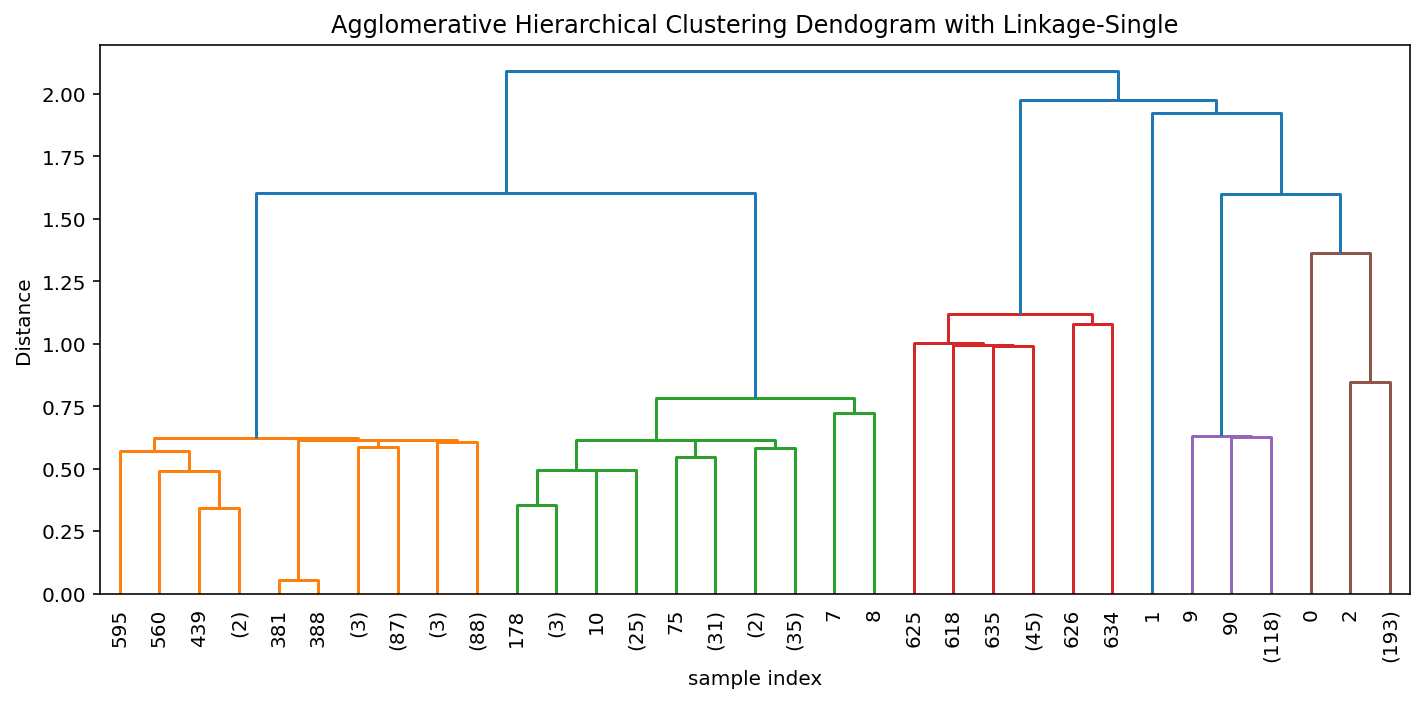

In [75]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram with Linkage-Single')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

-----------------------------------------------------------------------------------------------

### linkage-complete

In [76]:
# reading the CSV file into pandas dataframe
mydata_complete = saveDF.copy()
mydata_complete_scaled = mydata_complete.apply(zscore)
mydata_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 30.7 KB


In [77]:
model_complete = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='complete')
model_complete.fit(mydata_complete_scaled)
mydata_complete['labels_Complete'] = model_complete.labels_

mydata_complete_scaled["labels_Complete"] = prediction
mydata_complete.head(100)
mydata_complete.groupby(['labels_Complete']).mean()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
labels_Complete                                                            
0                    25900.826446             4.37686            2.54876   
1                   141040.000000             8.74000            0.60000   

                 Total_visits_online  Total_calls_made  
labels_Complete                                         
0                           1.933884          3.786777  
1                          10.900000          1.080000

In [78]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(mydata_complete_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(mydata_complete_scaled))

c

0.8995753024352903

### linkage='average' has better cophenet coefficient

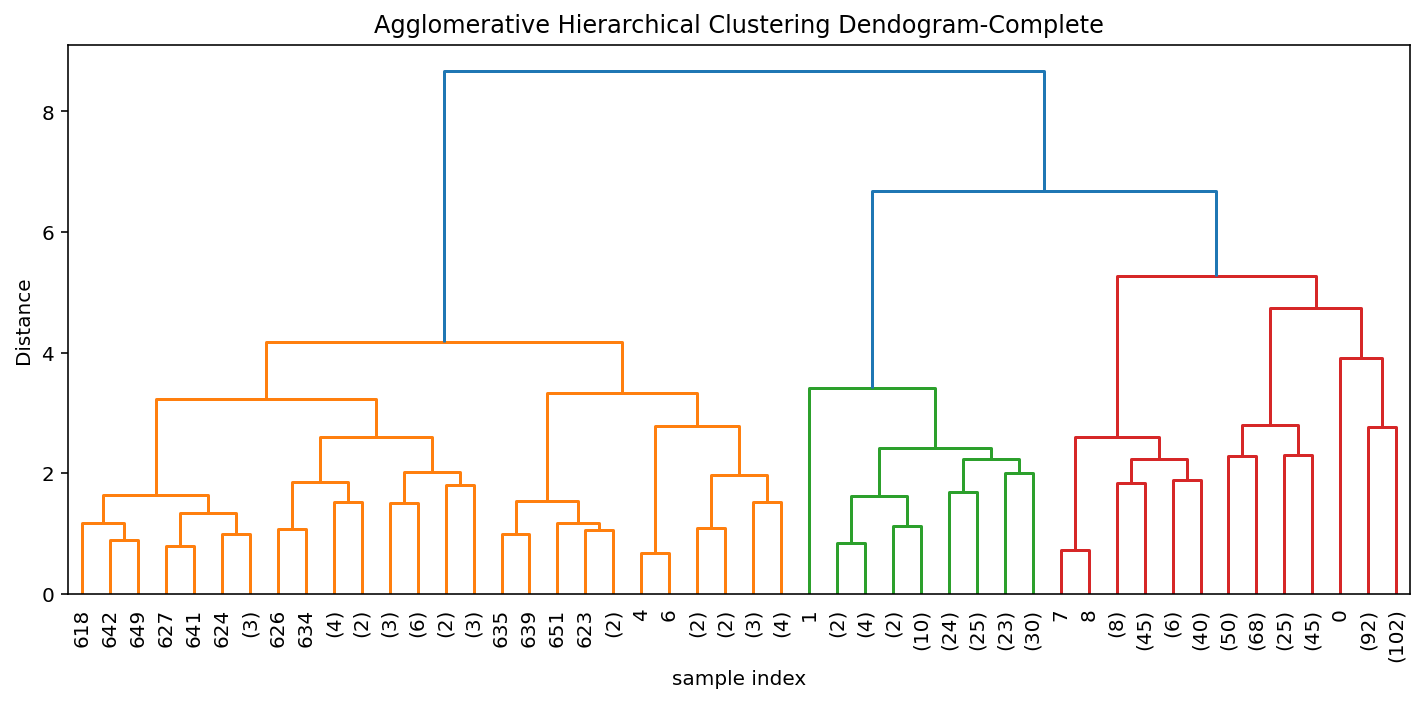

In [79]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram-Complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023617BB7BB0>,
      dtype=object)

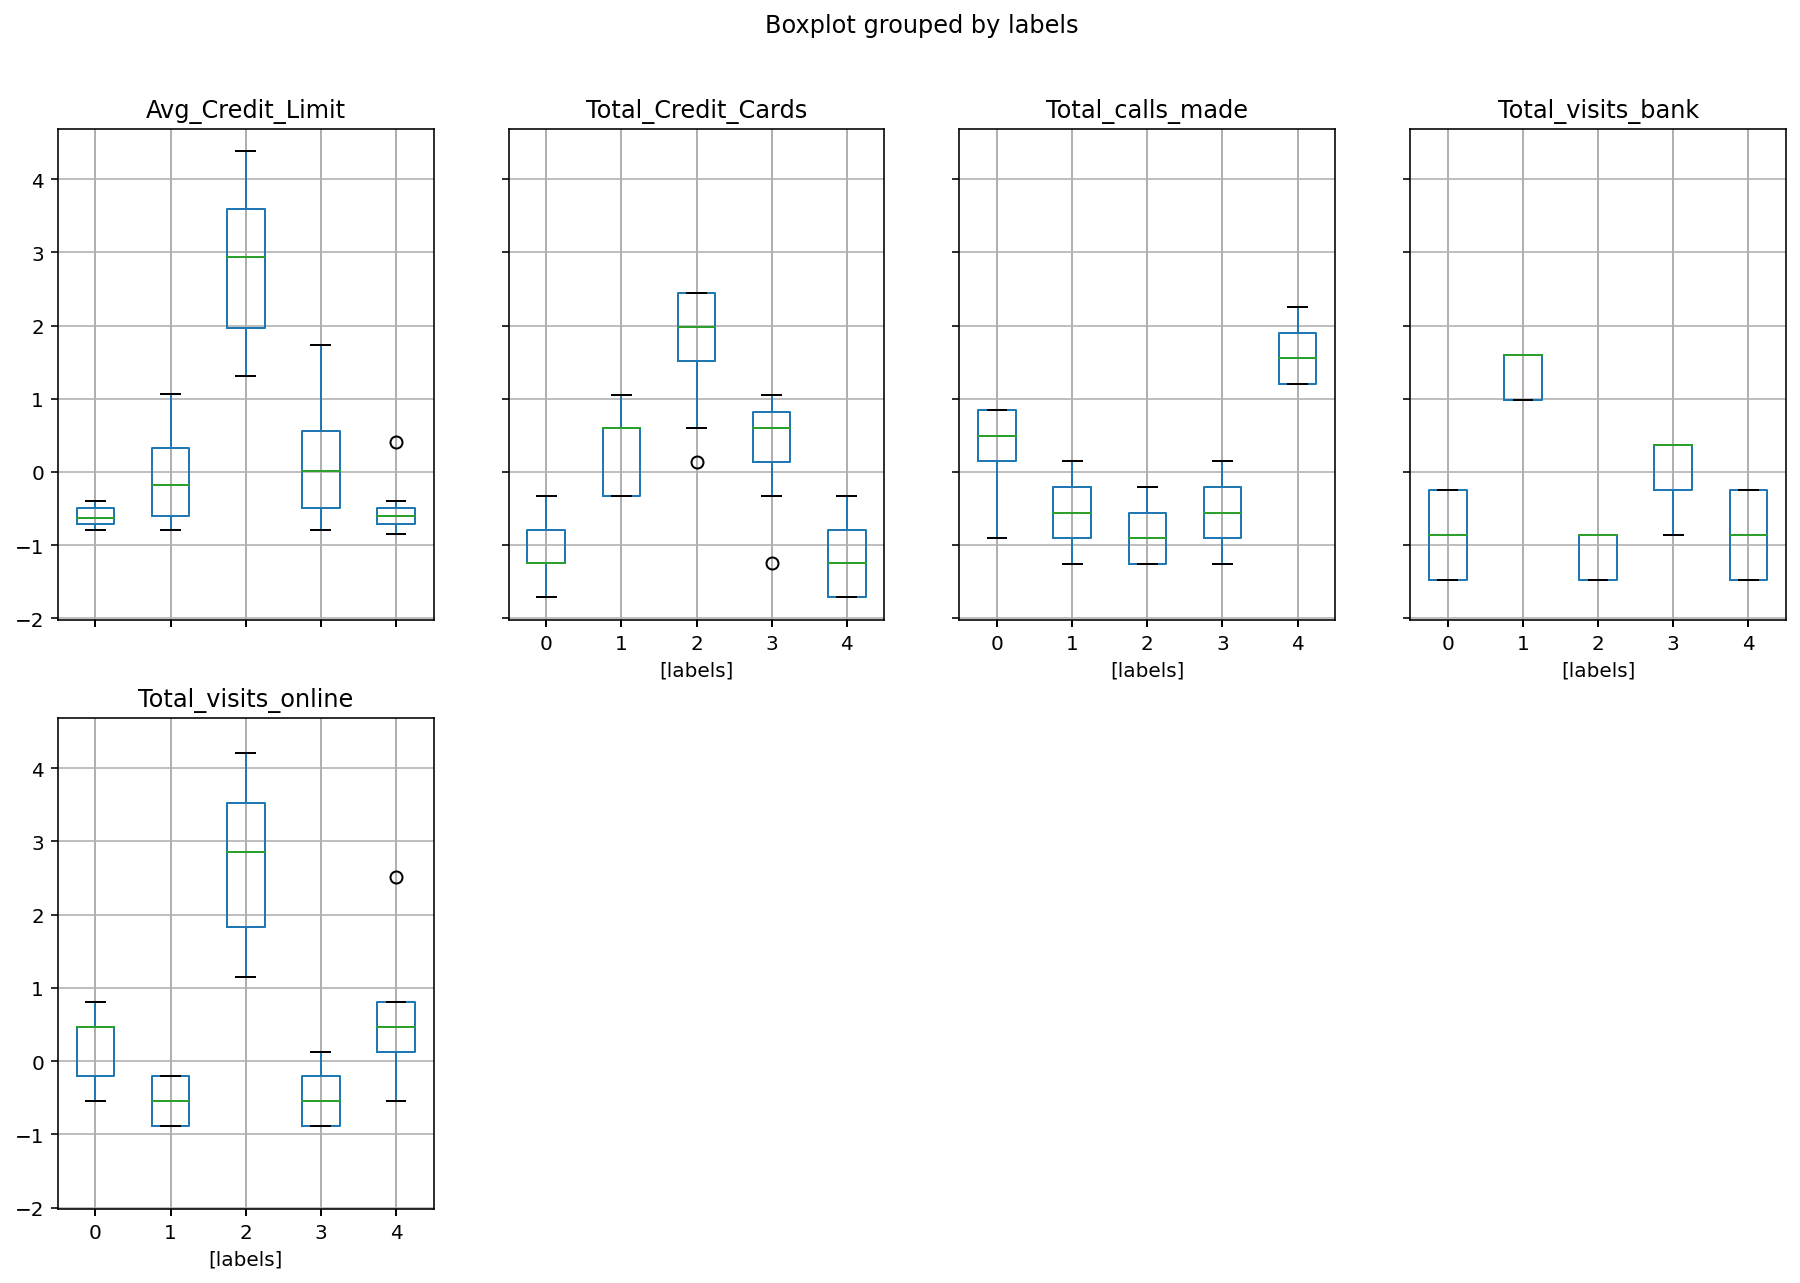

In [80]:
mydata_h_scaled.boxplot(by='labels', layout = (2,4),figsize=(15,10))

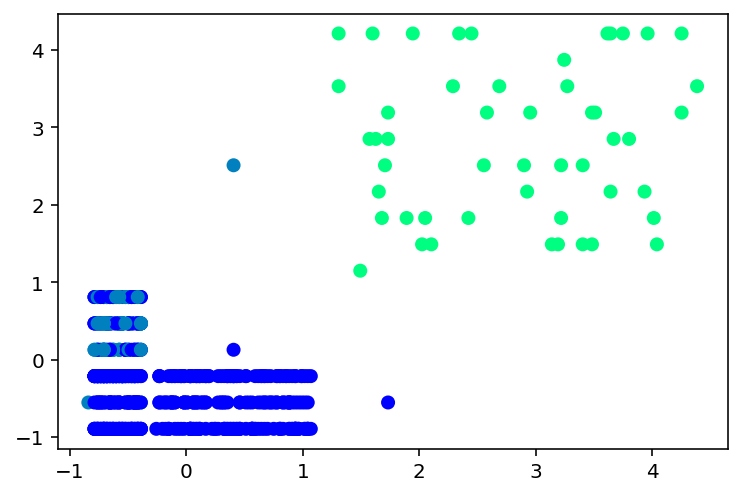

In [81]:
# Visualizing the clustering 
plt.scatter(mydata_complete_scaled['Avg_Credit_Limit'], mydata_complete_scaled['Total_visits_online'],   
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(mydata_complete_scaled), cmap =plt.cm.winter) 
plt.show() 

-----------------------------------------------------------------------------

In [82]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_samples

In [83]:
# reading the CSV file into pandas dataframe
mydata = saveDF.copy()
mydata_scaled = mydata.apply(zscore)
mydata_scaled.info()
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     655 non-null    float64
 1   Total_Credit_Cards   655 non-null    float64
 2   Total_visits_bank    655 non-null    float64
 3   Total_visits_online  655 non-null    float64
 4   Total_calls_made     655 non-null    float64
dtypes: float64(5)
memory usage: 30.7 KB


In [84]:
n_clusters=3
km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300)
km.fit(mydata)
cluster_labels = km.predict(mydata)

#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(mydata,cluster_labels)

#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(mydata,cluster_labels,metric="euclidean")

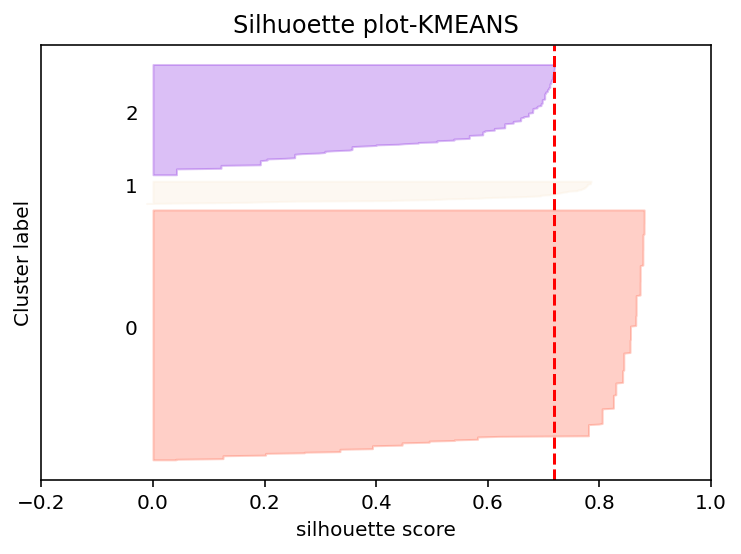

In [85]:
#Visualization
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot-KMEANS")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])



In [86]:
# reading the CSV file into pandas dataframe
mydata = saveDF.copy()
mydata_scaled = mydata.apply(zscore)
mydata_scaled.info()
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_Credit_Limit     655 non-null    float64
 1   Total_Credit_Cards   655 non-null    float64
 2   Total_visits_bank    655 non-null    float64
 3   Total_visits_online  655 non-null    float64
 4   Total_calls_made     655 non-null    float64
dtypes: float64(5)
memory usage: 30.7 KB


In [87]:
n_clusters=2
km = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
km.fit(mydata)

#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(mydata,cluster_labels)

#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(mydata,cluster_labels,metric="euclidean")

##  <b style='color:green'> Step-5: Calculate average silhouette score for both methods</b>

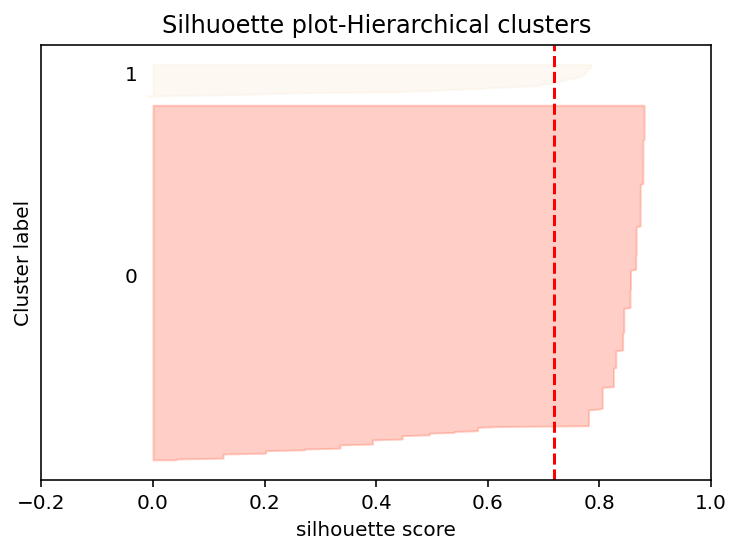

In [88]:
#Visualization
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot-Hierarchical clusters")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

In [89]:
##Scale the data
from scipy.stats import zscore

cluster_sil_scores = []
cluster_errors = []

cluster_range = range( 2, 15)  

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10, random_state=5)
    clusters.fit(mydata_scaled)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia
    cluster_sil_scores.append(metrics.silhouette_score(mydata_scaled, labels, metric='euclidean'))
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters  cluster_errors  Avg Sil Score
0              2     2027.386090       0.417724
1              3      926.079337       0.515466
2              4      774.625025       0.355757
3              5      698.827483       0.272974
4              6      637.374294       0.255423
5              7      595.697908       0.248684
6              8      558.642798       0.227559
7              9      533.769571       0.212046
8             10      508.110666       0.210691
9             11      484.596043       0.201332
10            12      457.625237       0.208423
11            13      440.776224       0.206808
12            14      423.951424       0.210908

In [90]:
##Scale the data
from scipy.stats import zscore

cluster_sil_scores = []
cluster_errors = []

cluster_range = range( 2, 15)  

for num_clusters in cluster_range:
    clusters = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean',  linkage='average')
    clusters.fit(mydata)
    labels = clusters.labels_                     # capture the cluster lables)    # capture the intertia
    cluster_sil_scores.append(metrics.silhouette_score(mydata, labels, metric='euclidean'))
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

num_clusters  Avg Sil Score
0              2       0.769367
1              3       0.667959
2              4       0.701148
3              5       0.688356
4              6       0.687683
5              7       0.664952
6              8       0.668430
7              9       0.683038
8             10       0.684084
9             11       0.681230
10            12       0.681267
11            13       0.681930
12            14       0.682205

## PCA Analysis

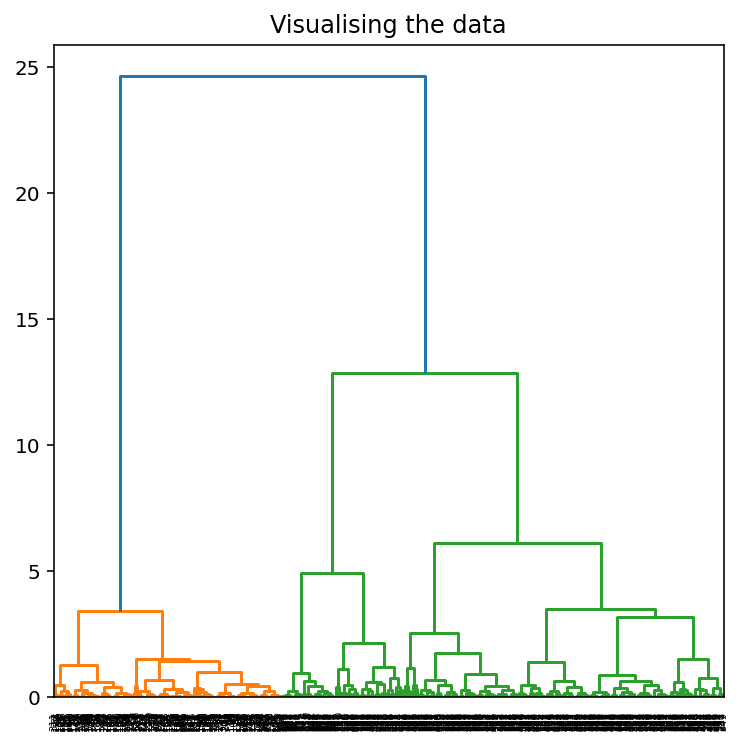

In [91]:


# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(mydata) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

-------------------------------------------------------------------------------------------------------------------------------

## <b style='color:green'>Compare K-means clusters with Hierarchical clusters. </b>


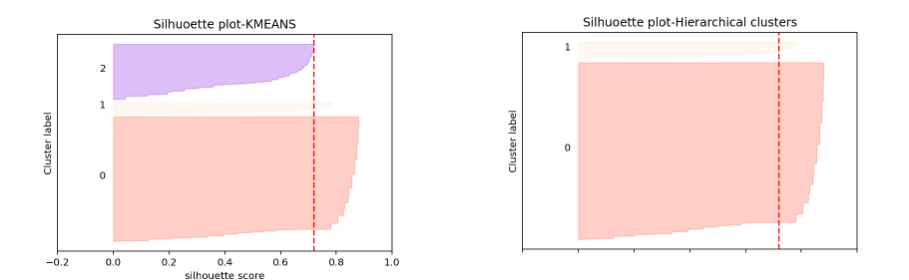

### Summary:

K-Means has three clusters

Hierarichal has Two clusters

looks like Cluster 0 has more data in KMEANS and Cluster 0 in case of Hierarchical Method


## <b style='color:green'>Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions.  </b>

### K-Means clustering

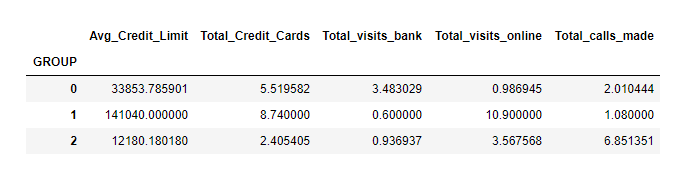

### Cluster 2 with 

1.Less Credit Limit

2.Less Number of Credit Cards

3.More Calls Made/Online Visits when Compared to Visiting Bank


### Cluster 1 with 

1.More Credit Limit

2.More Number of Credit Cards

3.More Online Visits when Compared to Visiting Bank/Calls

### Cluster 0 with 

1.Average Credit Limit

2.Average Number of Credit Cards

3.More Visiting Bank/Calls compared to online

### Hierarchical clustering

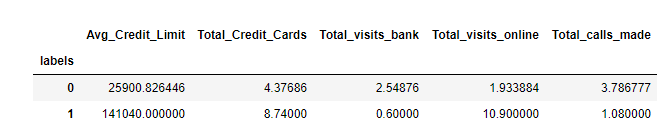

--------------------------------------------------------------------------

### Hierarchical clustering

### Cluster 1 with 

More Credit Limit

More Number of Credit Cards

More Online Visits when Compared to Visiting Bank/Calls

### Cluster 0 with 

Low/Avg  Credit Limit

Average Number of Credit Cards

More Visiting Bank/Calls compared to online

# Analysis

### 1. How many different segments of customers are there?

Based on data amd analysis we can have 2 segments of customers 

LOW/Average  Credit Customer(Could be New Customer) 

High Credit Limit Users(Existing/Good/Trusted Customer)

### 2. How are these segments different from each other?

These segments in different terms of 

#### Mode of communication for support service

How customer interacting to resolve their queries 

Few Customers choose Online when compared to calls or visit & vice versa 

### 3. What are your recommendations to the bank on how to better market to and service these customers?

For New Customers/Average Credit limit customer Looks like focus should be on Good Support for Bank Visit Campigns /Support for Calls to solve queries

For existing customers as long as good support for Online (Chat..etc)  will provide more customer satisfaction

So As per analysis Need to Increase more <b>support for Online</b> retain existing customer  when comapred to setup infrastructure for bank visits .

More Campigns at bank locations to attract new customers to visit and solve there queries via calls support when comapared to online.<b>Calls/in Person Support</b>